In [1]:
import os

import pandas as pd

import toolbox as tb

%matplotlib inline

In [2]:
data_path = os.path.join('..', 'data','prostate_cancer.txt')

In [3]:
data = pd.read_table(data_path, index_col=0)

In [4]:
data.train.value_counts()

T    67
F    30
Name: train, dtype: int64

In [5]:
train_data = data[data.train == 'T'].drop('train', axis=1)
test_data = data[data.train == 'F'].drop('train', axis=1)

In [6]:
train_data.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564


In [7]:
train_data.drop('lpsa', axis=1).corr()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
lcavol,1.000000,0.300232,0.286324,0.063168,0.592949,0.692043,0.426414,0.483161
lweight,0.300232,1.000000,0.316723,0.437042,0.181054,0.156829,0.023558,0.074166
age,0.286324,0.316723,1.000000,0.287346,0.128902,0.172951,0.365915,0.275806
lbph,0.063168,0.437042,0.287346,1.000000,-0.139147,-0.088535,0.032992,-0.030404
svi,0.592949,0.181054,0.128902,-0.139147,1.000000,0.671240,0.306875,0.481358
lcp,0.692043,0.156829,0.172951,-0.088535,0.671240,1.000000,0.476437,0.662533
gleason,0.426414,0.023558,0.365915,0.032992,0.306875,0.476437,1.000000,0.757056
pgg45,0.483161,0.074166,0.275806,-0.030404,0.481358,0.662533,0.757056,1.000000


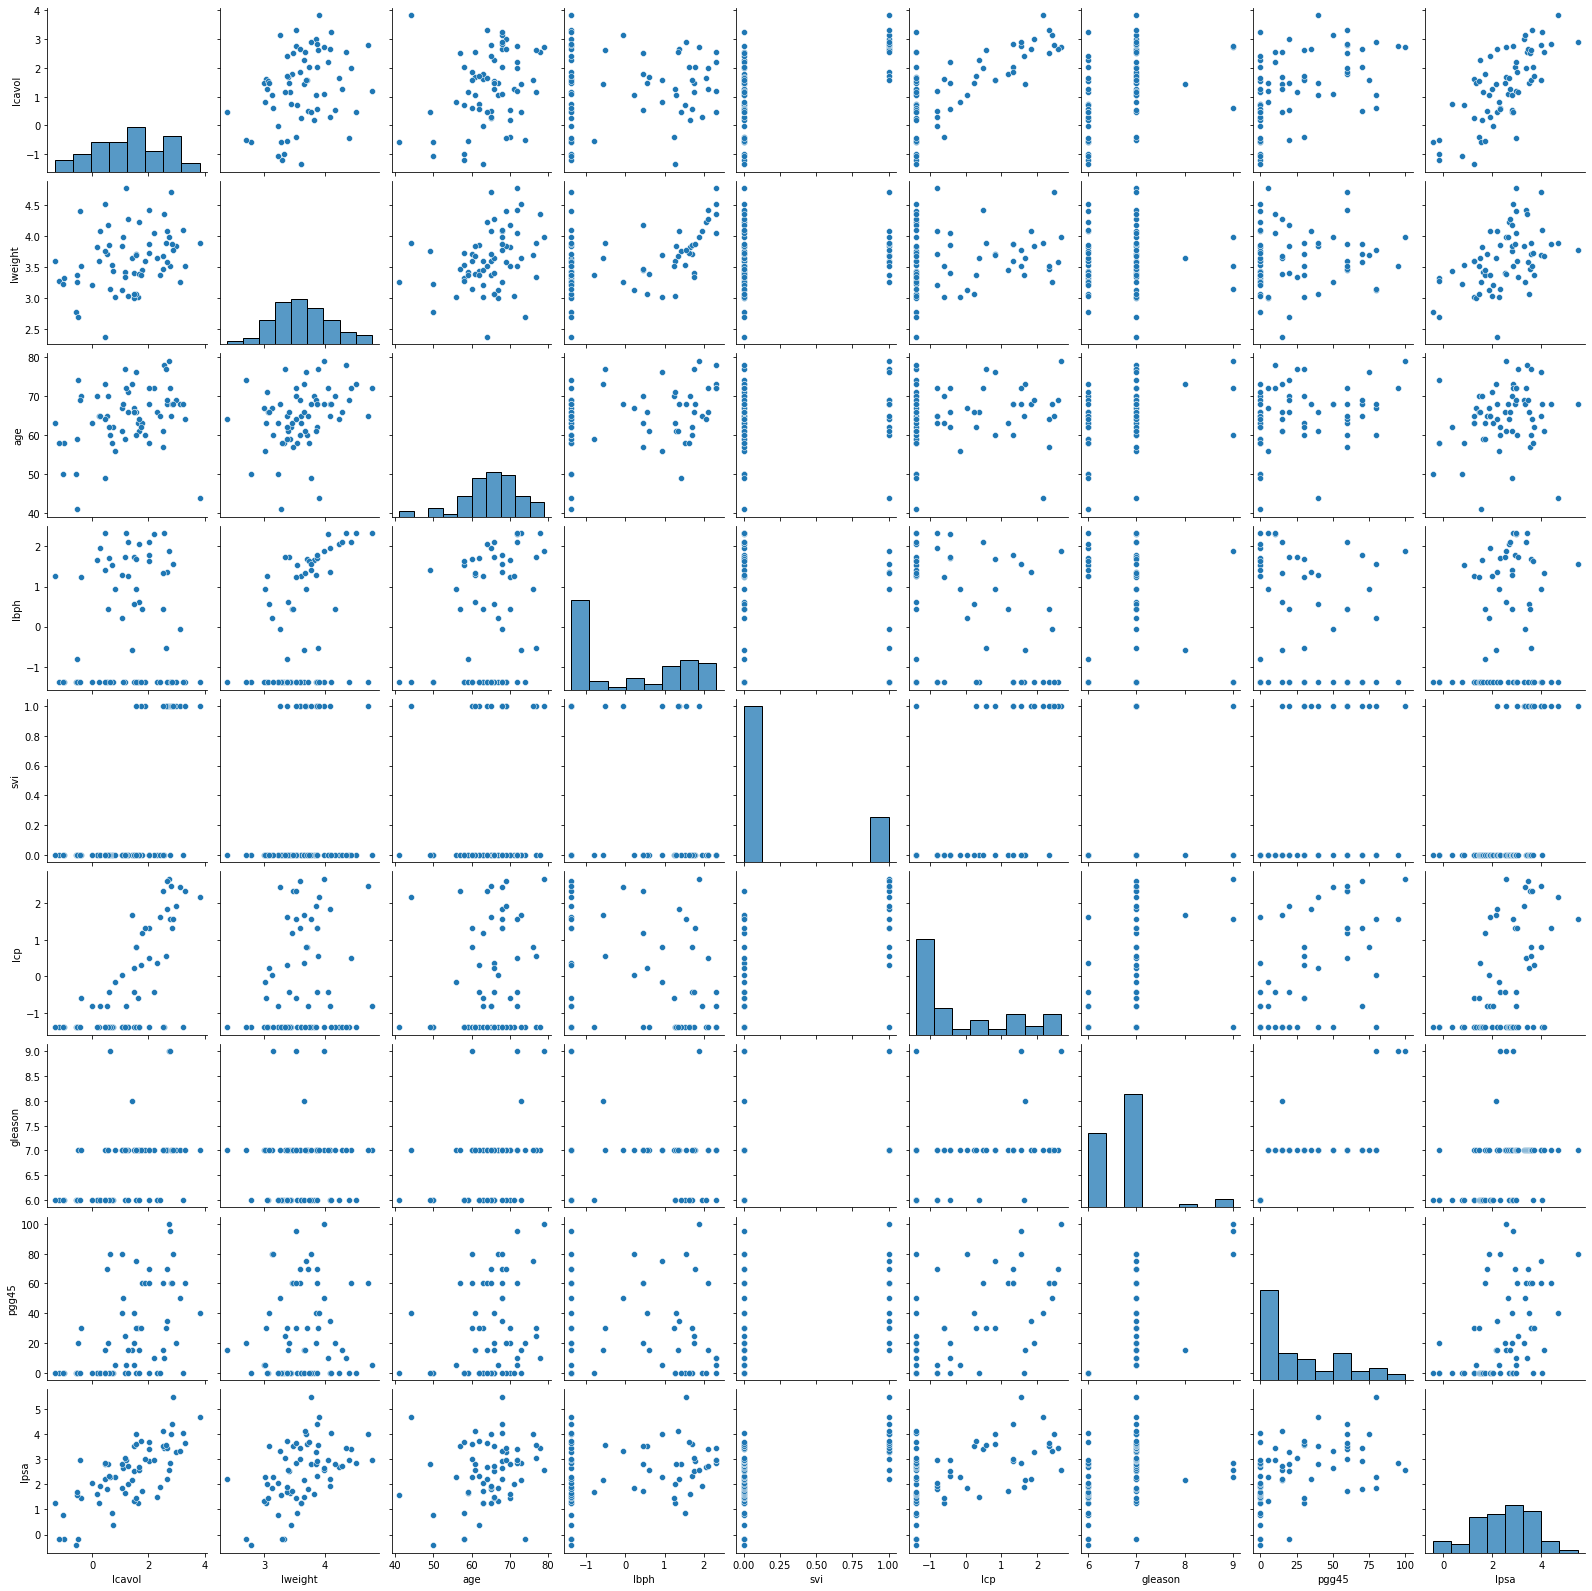

In [8]:
tb.pair_plot(train_data)

In [25]:
lrmod1 = tb.linear_model(train_data.drop('lpsa', axis=1), train_data.lpsa)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lpsa   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     16.47
Date:                Sun, 21 Feb 2021   Prob (F-statistic):           2.04e-12
Time:                        16:38:50   Log-Likelihood:                -67.505
No. Observations:                  67   AIC:                             153.0
Df Residuals:                      58   BIC:                             172.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4292      1.554      0.276      0.783      -2.681       3.539
lcavol         0.5765      0.107      5.366      0.000       0.361       0.792
lweight        0.6140      0.223      2.751      0.008       0.167       1.061
age           -0.0190      0.014     -1.396      0.168      -0.046       0.008
lbph           0.1448      0.070      2.056      0.044       0.004       0.286
svi            0.7372      0.299      2.469      0.017       0.140       1.335
lcp           -0.2063      0.111     -1.867      0.067      -0.428       0.015
gleason       -0.0295      0.201     -0.147      0.884      -0.432       0.373
pgg45          0.0095      0.005      1.738      0.088      -0.001       0.020
==============================================================================
Omnibus:                        0.825   Durbin-Watson:                   1.690
Prob(Omnibus):                  0.662   Jarque-Bera (JB):                0.389
Skew:                          -0.164   Prob(JB):                        0.823
Kurtosis:                       3.178   Cond. No.                     1.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
lrmod2 = tb.linear_model(train_data.drop(['lpsa','age','lcp','gleason','pgg45'], axis=1), train_data.lpsa)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   lpsa   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     29.98
Date:                Sun, 21 Feb 2021   Prob (F-statistic):           6.91e-14
Time:                        16:38:53   Log-Likelihood:                -71.156
No. Observations:                  67   AIC:                             152.3
Df Residuals:                      62   BIC:                             163.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3259      0.780     -0.418      0.677      -1.885       1.233
lcavol         0.5055      0.093      5.461      0.000       0.320       0.691
lweight        0.5388      0.221      2.441      0.018       0.098       0.980
lbph           0.1400      0.070      1.988      0.051      -0.001       0.281
svi            0.6718      0.273      2.459      0.017       0.126       1.218
==============================================================================
Omnibus:                        0.907   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.635   Jarque-Bera (JB):                0.732
Skew:                          -0.254   Prob(JB):                        0.694
Kurtosis:                       2.940   Cond. No.                         37.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now calculate F-statistic comparing both models

In [49]:
rss1 = lrmod1.resid.dot(lrmod1.resid)
rss2 = lrmod2.resid.dot(lrmod2.resid)

In [50]:
num = (rss2 - rss1)/(lrmod1.df_model - lrmod2.df_model)
den = rss1/lrmod1.df_resid

In [51]:
num/den

1.6697548846375196